## Project #1: <span style='color:blue '> Classification Problem Using the Titanic Dataset </span>

Welcome! In my pilot Data Analytics project, I am using the classic and commonly-used Titanic dataset in Kaggle which is particularly from a Machine Learning Competition being hosted to the community of Kaggle users. **Disclaimer**: While this notebook makes reference of the said competition, I only intend to demonstrate my data analytics skills coming off a recent certification I finished to simply immerse myself in the "learn-do project-iterate" cycle without the intention of participating and submitting this Kernel as an entry. 

This project involves 2 datasets: **Train** and **Test**, and includes the tasks of exploratory data analysis, converting data series into meaningful values/categories for easy analysis and visualization, determining relevant variables that impacts survival, and training the models to predict the survival of passengers from the Test dataset. 

**Citation**: This project is inspired by the works of following Kaggle users / data scientists from which the concepts and workflow of this project are based upon. The links of their workbook submitted to the competition are provided below. Special acknowledgement to Ken Jee for being a great inspiration and motivation to my data science journey.

1. Ken Jee - https://www.kaggle.com/kenjee/titanic-project-example
2. Ritesh Patil - https://www.kaggle.com/riteshpatil8998/top-11-leaderboard-titanic-data-analysis

## Overview
The following are the sequence of tasks performed in this project:

**1. Loading the dataset**
>    * Installing libraries
>    * Loading datasets

**2. Exploratory Data Analysis**
>    * Statistical Summaries
>    * Visualizations
>    * Pivot Tables

**3. Data Cleaning**
>    * Inspecting null values
>    * Imputing null values
>    * Feature Engineering

**4. Model Building**

**5. Model Ensembling**

**6. Model Evaluation**

## 1. Loading the Datasets

In [ ]:
# Installing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 200)

In [ ]:
# Loading the datasets
training = pd.read_csv('../input/titanic/train.csv')
training.head()

In [ ]:
testing = pd.read_csv('../input/titanic/test.csv')
testing.head()

In [ ]:
# Quick look at the column names, data types, and shape of each dataframe
print('Training dataset')
print(training.dtypes)
print(training.shape, end = '\n\n')
print('Testing dataset')
print(testing.dtypes)
print(testing.shape, end = '\n\n')

## 2. Exploratory Data Analysis (EDA)

In this step, we will run some statistical summaries and inspect our data to understand its general characteristics in preparation for data cleaning. We will also create visualizations (histograms, bar chart, and heat map) to help us with visual clues on the trends and finally, provide findings based on the outcomes.

In [ ]:
training.describe()

In [ ]:
# Correlation and Heatmap 
print(training[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(), end ='\n\n')
sns.heatmap(training[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),annot=True)
plt.show()

In [ ]:
# Organizing the variables according to their data types (nummerical or categorical) to easily navigate these similar groups when creating plots.
training_num = training[['Age','SibSp','Parch','Fare']]
training_cat = training[['Survived', 'Pclass','Sex','Embarked', 'Ticket', 'Cabin']]

In [ ]:
# Starting with the numerical data, we create a loop to show how the distribution of the data looks like
for i in training_num.columns:
    plt.hist(training_num[i])
    plt.title(i)
    plt.show()

In [ ]:
# For the categorical data, we create barplots to compare frequencies of data
for i in training_cat:
    x = training_cat[i].value_counts().index
    y = training_cat[i].value_counts()
    sns.barplot(x,y).set_title(i)
    plt.show()

#### **Summary of Initial Findings and observations:**

General observation, there is an outlier data under Fare. The correlation coefficients and heatmap show a low negative relationship existing between Survived and Pclass and a moderate negative relationship between Pclass and Fare. From this correlation stats, the latter is quite self-explanatory and offers no relevant insight.

For the Numerical Data, majority of the passengers in the Train dataset:
1. Were **aged between 25-30 years old**, the data also has a normal distribution
2. Have **0 siblings on-board** - we can explore and combine SibSp and Parch to create "family size" since these are closely related variables
3. Have **0 parent and children on-board** - to explore combining with SibSp to create "family size" variable
4. Have **paid lower fares** (assumption that most of the passengers boarded on a general ticket, or from low-to-middle class social group). We can try to normalize this variable to reduce the skewness and decrease the massive range in fares as there is an outlier around 500 level. 

For the Categorical Data, majority of the passengers in the Train dataset:  
  1. **Did not survive**
  2. Were from **Pclass 3**
  3. Were **male**
  4. Have embarked from **Port S** (Southampton)
  5. Ticket and Cabin - wide-range of categories caused the x-axis to overlap and appear too crampped, this can be narrowed down using feature engineering and group categories with similar features.
  
Next, let us create pivot tables to compare survival rate across numerical and categorical data to help us get insights further and determine which variables are relevant to the model.

In [ ]:
# Pivot for the numerical variables 
pd.pivot_table(training, index = 'Survived', values = training_num)

In [ ]:
# Distribution plot for granularity
g = sns.FacetGrid(training, col='Survived')
g = g.map(sns.distplot, "Age")

In [ ]:
# Breaking down SibSp and Parch to check survival per value
print(pd.pivot_table(training, index = 'Survived', columns = 'SibSp', values = 'Ticket', aggfunc = 'count'), end = '\n\n')
print(pd.pivot_table(training, index = 'Survived', columns = 'Parch', values = 'Ticket', aggfunc = 'count'))

In [ ]:
# For the categorical variables
print(pd.pivot_table(training_cat, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'),end = '\n\n') 
print(pd.pivot_table(training_cat, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'), end = '\n\n')
print(pd.pivot_table(training_cat, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'), end = '\n')

#### **Summary of Additional Findings and Analysis**:
   1. Mean Age of survivors to non-survivors are not far from each other, but looking at the plot there is an indication that **many young passengers have survived**.
   2. Passengers with **high fares have higher survival rate**, twice as much as passengers with low fare.
   3. While Passengers with **0 siblings on-board have higher non-survival rate** (could be due to other factors like Pclass). It can also be assumed that passengers with more siblings on-board have less survival rate. Again, we can explore and combine SibSp and Parch to create "family size" since these are closely-related variables.
   4. Most of the survivors were **female**. 
   5. Most of the survivors **belonged to Pclass 1**, and almost 70% of the non-survivors belonged to Pclass 3, indication that Pclass 1 passengers, those who paid higher fares (based on the correlation stats), had a higher chance of survival than passengers from other Pclass.
   6. Most of the survivors have **embarked from port S** (Southampton), however, most of the non-survivors were also from the same port of embarkation. This variable could be less relevant to predict survival.

## 3. Data Cleaning

In this step, we will run some functions to inspect our dataset and find out missing values. We will also proceed imputing the missing data so we can give another round of exploratory data analysis before we could finally determine which variables are relevant to survival of passengers.

In [ ]:
# Getting the count of null values
print(training.isnull().sum(), end = '\n\n')
print(testing.isnull().sum())

#### Imputing Null Values
Age and Cabin have significant number of missing values, while Embarked has 2. We can impute the missing values using Mean or Median value for Age, and probably Mode category for Cabin and Embarked since they are Object data types. I also want to explore if there would be any difference between Mean Age of Male and Mean Age of Female and consider imputing the missing values based on Sex instead of the overall Mean Age.

In [ ]:
# Getting the Mean Age of the entire set and each of the sex category
print("Mean Age - ", training.Age.mean())
print("Median Age - ", training.Age.median())
print("Mean Age (Male) - ", training.groupby(training['Sex'] == 'male')['Age'].mean()[1])
print("Mean Age (Female) - ", training.groupby(training['Sex'] == 'female')['Age'].mean()[1])

In [ ]:
# Imputing the Null Age using the Mean Age according to Sex (for train data)
meanagemale1 = training.groupby(training['Sex'] == 'male')['Age'].mean()[1]
meanagefemale1 = training.groupby(training['Sex'] == 'female')['Age'].mean()[1]
training['Age']  = training.groupby(training['Sex'] == 'male')['Age'].fillna(meanagemale1)
training['Age']  = training.groupby(training['Sex'] == 'female')['Age'].fillna(meanagefemale1)

In [ ]:
# Imputing the Null Age using the Mean Age according to Sex (for test data)
meanagemale2 = testing.groupby(testing['Sex'] == 'male')['Age'].mean()[1]
meanagefemale2 = testing.groupby(testing['Sex'] == 'female')['Age'].mean()[1]
testing['Age']  = testing.groupby(testing['Sex'] == 'male')['Age'].fillna(meanagemale2)
testing['Age']  = testing.groupby(testing['Sex'] == 'female')['Age'].fillna(meanagefemale2)

In [ ]:
# Checking if all the missing Age values have been replaced:
print('training null Age: ', training.Age.isnull().sum())
print('testing null Age: ', testing.Age.isnull().sum())

Embarked has 2 missing values which we can impute by either using the Mode data ("S") or we can do a bit of checking on the Embarked data of passengers having similar characteristics to those with missing Embarked data.

In [ ]:
# Showing the data of 2 passengers with missing Embarked data
training.loc[training['Embarked'].isnull()]

In [ ]:
# Showing the passengers with similarities to the 2 passengers with missing Embarked data based on Ticket and Cabin 
training.loc[training['Ticket'].str.startswith('113') & training['Cabin'].str.startswith('B')]

From the above exercise, it would make sense to simply use 'S' to fill-in the missing data in Embarked.

In [ ]:
# Imputing the missing Embarked Fare value using the Mode class
training['Embarked'] = training['Embarked'].fillna("S")

# To check if Embarked the missing values have been replaced:
print(testing.Embarked.isnull().sum())

Testing has 1 null data, let us just impute this using Mean Fare of the testing dataset.

In [ ]:
# Imputing the missing Fare value using the Mean data
testing['Fare'] = testing['Fare'].fillna(testing['Fare'].mean())

# To check if Fare the missing value has been replaced:
print(testing.Fare.isnull().sum())

#### Feature Engineering

We will apply feature engineering to Cabin, Ticket, and also to Name to narrow down categories and convert them into useable data for analysis and visualization. Afterwards, we will run them through a pivot tables to compare their association with the survival of the passengers.

For Cabin, we will create a classification of passengers occupying single to multiple cabins and then another set of classification based on the letter of their cabin. Take note that majority of the rows herein are null. We will still do EDA later after we performed this step to observe survival.

In [ ]:
# Just to show first how the Cabin data look like
training.Cabin.value_counts()

In [ ]:
# We will classify passengers from those occupying single cabin to multiple ones.
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

# Check the result
training.cabin_multiple.value_counts()

In [ ]:
# Next is to create another classification based on the 1st letter of the passenger's cabin.
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

# Check the result
training.cabin_adv.value_counts()

For Ticket, we will create a classification of passengers by stripping off the letter indicated on their ticket. Take note that there are also numeric tickets which will all be segmented into one category.

In [ ]:
# Just to show first how the Ticket data look like
training.Ticket.value_counts()

In [ ]:
# Create classification whether Ticket is numerical or not
training['num_ticket'] = training.Ticket.apply(lambda x: 'Yes' if x.isnumeric() else 'No')

# Check the result
training.num_ticket.value_counts()

In [ ]:
# For tickets that start with letter, we classify them further
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

# Check the result
training.ticket_letters.value_counts()

For Name, we will create a new classification of passengers by stripping off the title that is part of the Name data.

In [ ]:
# Just to show first how the Name data look like
training.Name.value_counts()

In [ ]:
# Stripping off the title from Name
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Check the result
training.name_title.value_counts()

In [ ]:
# Cleaning up, replacing Ms with Miss
training['name_title'] = training['name_title'].replace(['Ms'], 'Miss')

# Check the result
training.name_title.value_counts()

In [ ]:
# Combining SibSp and Parch since they are closely-related variables
training['Familysize'] = training['SibSp'] + training['Parch'] + 1

training['Familysize'].value_counts()

In [ ]:
# For these feature engineered variables, let us try Ritesh Patil's approach in analyzing variables versus Survived
print(training[['cabin_multiple', 'Survived']].groupby(['cabin_multiple'], as_index=False).mean().sort_values(by='Survived', ascending=False), end = '\n\n')
print(training[['cabin_adv', 'Survived']].groupby(['cabin_adv'], as_index=False).mean().sort_values(by='Survived', ascending=False), end = '\n\n')
print(training[['num_ticket', 'Survived']].groupby(['num_ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False), end = '\n\n')
print(training[['ticket_letters', 'Survived']].groupby(['ticket_letters'], as_index=False).mean().sort_values(by='Survived', ascending=False), end = '\n\n')
print(training[['name_title', 'Survived']].groupby(['name_title'], as_index=False).mean().sort_values(by='Survived', ascending=False), end = '\n\n')
print(training[['Familysize', 'Survived']].groupby(['Familysize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# Applying the feature engineering procedures to Testing dataset
testing['cabin_multiple'] = testing.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
testing['cabin_adv'] = testing.Cabin.apply(lambda x: str(x)[0])
testing['num_ticket'] = testing.Ticket.apply(lambda x: 'Yes' if x.isnumeric() else 'No')
testing['ticket_letters'] = testing.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
testing['name_title'] = testing.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
testing['Familysize'] = testing['SibSp'] + testing['Parch'] + 1

In [ ]:
testing['Familysize'].isnull().sum()

In [ ]:
# Normalizing Fare as it is right skewed also due to the outlier 
training['norm_fare'] = np.log(training.Fare+1)
testing['norm_fare'] = np.log(testing.Fare+1)

In [ ]:
# To check the result after applying Logarithmic Normalization
g = sns.FacetGrid(training, col='Survived')
g = g.map(sns.distplot, "norm_fare")

## 4. Model Building
As mentioned by Ken Jee in the accompanying YT video for this project, it is advisable for beginners to train as much models whenever possible in order not just to experience applying them and being able to compare best scores, but also to get a grasp how the models perform in particular use case and probably realize which are the best ones to use for the next type of project to analyze or problem to solve.

Based on the exploratory data analysis, these are the relevant variables we will include in training our models: 
 * Pclass
 * Sex
 * Age
 * Familysize
 * norm_fare
 * Embarked
 * cabin_adv
 * cabin_multiple
 * name_title 
 
Num_ticket was removed because there is barely difference between survival between carriers of numeric to non-numeric tickets, SibSp and Parch were combined as one into Familysize, while ticket_letters does not make a good variable to factor in since it only covers 25% of the entire data. 

#### Model Preprocessing

In [ ]:
# Creating Train Test column to distinguish data and combining both datasets just to make some steps applicable in one go
training['train_test'] = 1
testing['train_test'] = 0
testing['Survived'] = np.NaN
alldata = pd.concat([training,testing])

# Converting Pclass to category for pd.get_dummies()
alldata.Pclass = alldata.Pclass.astype(str)

# Creating dummy variables for the category data
alldummies = pd.get_dummies(alldata[['Pclass','Sex','Age','Familysize','norm_fare','Embarked','cabin_adv','cabin_multiple','name_title','train_test']])

# Splitting to train and test again to cast final objects for the model training
X_train = alldummies[alldummies.train_test == 1].drop(['train_test'], axis =1)
X_test = alldummies[alldummies.train_test == 0].drop(['train_test'], axis =1)
y_train = alldata[alldata.train_test==1].Survived
y_train.shape

In [ ]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
alldummies_scaled = alldummies.copy()
alldummies_scaled[['Age','Familysize','norm_fare']]= scale.fit_transform(alldummies_scaled[['Age','Familysize','norm_fare']])
alldummies_scaled

X_train_scaled = alldummies_scaled[alldummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = alldummies_scaled[alldummies_scaled.train_test == 0].drop(['train_test'], axis =1)

print(X_train_scaled.isnull().sum(), end = '\n\n')
print(X_test_scaled.isnull().sum(), end = '\n\n')

#### Cross Validation (Baseline)
On to the actual model building, first we will get the Baseline Validation Performance of the following models using the 5 fold cross validation and then using hard Voting Classifer, we will fit the model to the Test data to predict the survival. As used by both sources (cited at the start of this notebook), we will also apply Grid Search to tune and improve the models. We will compare both results side-by-side and select the best models for the ensembling.

> 1. Naive Bayes
2. Logistic Regression 
3. Decision Tree
4. K Nearest Neighbor
5. Random Forest
6. Support Vector Classifier 
7. Xtreme Gradient Boosting 
8. Soft Voting Classifier 

In [ ]:
# Importing the needed libraries 
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Gaussian Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

In [ ]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

In [ ]:
# Support Vector Classifier
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

In [ ]:
# Xtreme Gradient Boosting
xgb = XGBClassifier(random_state = 1, eval_metric = 'error')
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

In [ ]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

#### Results
Summary of Cross Validation Score (Baseline) arranged according to performance

|Model|Baseline|
|-----|--------|
|Support Vector Classifier| 82.9%| 
|Logistic Regression| 82.9%| 
|K Nearest Neighbor| 82.6%|
|Xtreme Gradient Boosting| 82.0%| 
|Random Forest| 80.5%| 
|Decision Tree| 77.9%| 
|Naive Bayes| 65.8%| 

#### Grid Search
Now, we will use Grid Search to tune the models to see whether scores will improve. Once we got the scores, we will create an ensemble again using Voting Classifier to predict the Testing dataset. 

In [ ]:
# Importing the libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
# Logistic Regression Grid Search
lr = LogisticRegression(random_state = 10, max_iter = 1000)
params = {"solver": ["lbfgs","liblinear"],
          'penalty':['l1','l2'], 
          'C': [1, 3, 10, 20, 30, 40]}
lr_gs = GridSearchCV(lr, param_grid = params,cv=5, n_jobs=-1)
best_lrgs = lr_gs.fit(X_train_scaled,y_train)
print(best_lrgs.best_score_,'\n', best_lrgs.best_params_)

In [ ]:
# K Nearest Neighbor Grid Search
knn = KNeighborsClassifier()
params = {'n_neighbors':[3,5,7,9], 
          'weights':['uniform','distance'], 
          'algorithm': ['ball_tree','kd_tree','auto'], 
          'p':[1,2]}
knn_gs = GridSearchCV(knn, param_grid = params, cv=5, n_jobs=-1)
best_knngs = knn_gs.fit(X_train_scaled, y_train)
print(best_knngs.best_score_,'\n', best_knngs.best_params_)

In [ ]:
# Support Vector Classifier Grid Search
svc = SVC(probability = True)
params = [{'kernel': ['rbf'], 
           'gamma': [.1,.5,1,2,5,10], 
           'C':[.1,1,10,100,1000]}, 
          {'kernel': ['linear'], 
           'C': [.1,1,10,100,1000]}, 
          {'kernel': ['poly'], 
           'degree':[2,3,4,5], 
           'C': [.1,1,10,100,1000]}]
svc_gs = GridSearchCV(svc, param_grid = params, cv=5, n_jobs=-1)
best_svcgs = svc_gs.fit(X_train_scaled, y_train)
print(best_svcgs.best_score_,'\n', best_svcgs.best_params_)

In [ ]:
# Random Forest Grid Search
rf = RandomForestClassifier(random_state = 1)
params = {'n_estimators':[550],
          'criterion':['gini','entropy'],
          'max_depth': [25],
          'max_features':['auto','sqrt',10],
          'min_samples_leaf': [2,3],
          'min_samples_split': [2,3]}
rf_gs = GridSearchCV(rf, param_grid = params, cv=5, n_jobs=-1)
best_rfgs = rf_gs.fit(X_train_scaled, y_train)
print(best_rfgs.best_score_,'\n', best_rfgs.best_params_)

In [ ]:
# Xtreme Gradient Boosting Grid Search
xgb = XGBClassifier(random_state=1, eval_metric = 'error')
params = {'n_estimators': [550],
    'colsample_bytree': [0.85],
    'max_depth': [10],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']}
xgb_gs = GridSearchCV(xgb, param_grid = params,cv=5, n_jobs=-1)
best_xgbgs = xgb_gs.fit(X_train_scaled, y_train)
print(best_xgbgs.best_score_,'\n', best_xgbgs.best_params_)

#### Results
Summary of Grid Search Cross Validation (Tuned Performance) arranged according to performance

|Model|Tuned Performance|
|-----|--------|
|Xtreme Gradient Boosting|84.8% | 
|Random Forest| 83.5%| 
|K Nearest Neighbor| 83.4%|
|Support Vector Classifier|83.2% | 
|Logistic Regression|82.9% | 



#### Comparison of Results
Side-by-side comparison of Cross-Validation (Baseline) and Grid Search Cross Validation (Tuned):

|Model|Baseline|Tuned |
|-----|--------|-----------------|
|Random Forest|80.5%|83.5%| 
|K Nearest Neighbor|82.6%|83.4%|
|Support Vector Classifier|82.9%|83.2% | 
|Logistic Regression|82.9% |82.9%| 
|Xtreme Gradient Boosting|82.0%|84.8% |
|Decision Tree|77.9% ||
|Naive Bayes|65.8%||


## 5. Model Ensembling
We will do ensembling of models using Voting Classifer for the 2 cross validations we performed. Afterwards, we will compare the performance, fit the models to the train data and predict the test data.

Quoting Ken Jee, Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers. A "soft" classifier averages the confidence of each of the models. If the average confidence is > 50% that it is a 1 it will be counted as such

In [ ]:
# For the Cross Validation (Baseline), we will use Hard Voting Classifier using only the 5 best performing estimators
hvc_cv = VotingClassifier(estimators = [('lr', lr),('knn', knn),('rf',rf),('svc', svc),('xgb',xgb)], voting = 'hard')
cv = cross_val_score(hvc_cv, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())    

In [ ]:
# Fitting the CV ensemble and predicting the Test data
hvc_cv.fit(X_train_scaled, y_train)
yhat_base_hvc_cv = hvc_cv.predict(X_train_scaled).astype(int)
pred_data = {'Passenger ID': training.PassengerId, 'Survived_cv': yhat_base_hvc_cv}
output1 = pd.DataFrame(data = pred_data)

In [ ]:
# For the Grid Search CV, we will use Hard Voting Classifier involving all the estimators
hvc_gs = VotingClassifier(estimators = [('lr', best_lrgs),('knn', best_knngs),('rf',best_rfgs),('svc', best_svcgs),('xgb',best_xgbgs)], voting = 'hard')
cv1 = cross_val_score(hvc_gs, X_train_scaled, y_train, cv=5)
print(cv1)
print(cv1.mean()) 

In [ ]:
# Fitting the GS ensemble and predicting the Test data
hvc_gs.fit(X_train_scaled, y_train)
yhat_base_hvc_gs = hvc_gs.predict(X_test_scaled).astype(int)
pred_data2 = {'Passenger ID': testing.PassengerId, 'Survived_gs': yhat_base_hvc_gs}
output2 = pd.DataFrame(data = pred_data2)

In [ ]:
# Combining the outputs for better comparison view
alloutput = output1.join(output2['Survived_gs'])
alloutput['Matched?'] = alloutput.apply(lambda x: 1 if x.Survived_cv == x.Survived_gs else 0, axis = 1)

The Grid Search Cross Validation gave the higher Voting Classifier mean score among the 2 ensembles, better by only a small variance. And due to this, the prediction between the two ensembles were too close having only 9 instances of mismatched result. 

In [ ]:
# Creating Summary Table to compare the Prediction outcomes between the ensembles.
sum_ = alloutput[['Survived_cv','Survived_gs']].sum().astype(int)
count = alloutput[['Survived_cv','Survived_gs']].count().values.astype(int)
aop = pd.DataFrame(columns = ['Survived', "Not_Survived"])
aop['Survived'] = sum_
aop['Not_Survived'] = count - sum_
aop

In [ ]:
# This is to show in detail the number of disparity between the 2 and the specific outcomes where the discrepancy occurred
alloutput[['Survived_cv','Survived_gs', 'Passenger ID']].groupby(['Survived_cv','Survived_gs'], as_index = False).count().sort_values(by='Passenger ID', ascending=False)

In [ ]:
# Saving the Predictions to CSV file
output1.to_csv("Predictioncv.csv", index=False)
output2.to_csv("Predictiongs.csv", index=False)
alloutput.to_csv("Comparison.csv", index=False)

## 6. Model Evaluation
For the last part, we will assess our models by creating a Confusion Matrix and use the metric called F1 Score. 

**Confusion Matrix** is one of the concepts in model evaluation that provides insight to our predictions as it shows the correct (True Positives, True Negatives) and incorrect (False Positives, False Negatives) outcomes on each class. This can be illustrated by a simple Groupby table, but visualizing the matrix into a graph (especially if there are more than 2 classes and applied to different algorithms) aids in understanding model validity and appropriateness. 

**F1 Score** is a classification model assessment metric that takes into account the weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. **Precision** measures how good our model is when the prediction is positive. **Recall** measures how good our model is at correctly predicting positive classes. The formula for the F1 score is:

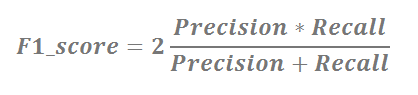

We will use the fitted Train sets to predict the survival of passengers, compare the predictions with the actual observations to analyze Confusion Matrix, and lastly, visualize it.


In [ ]:
# Applying the Cross Validation ensemble to the Train set to predict Survival
hvc_cv.fit(X_train_scaled, y_train)
yhat_base_hvc_cv_forME = hvc_cv.predict(X_train_scaled).astype(int)
pred_data3 = {'Passenger ID': training.PassengerId, 'Survived_Pred': yhat_base_hvc_cv_forME}
output3 = pd.DataFrame(data = pred_data3)
output3 = pd.concat([output3,y_train.astype(int)], axis = 1)

# Tabular form similar to Confusion Matrix
output3.groupby(['Survived', 'Survived_Pred'], as_index=False).count().sort_values(by='Passenger ID', ascending=False)

In [ ]:
# Applying the Grid Search Validation ensemble to the Train set to predict Survival
hvc_gs.fit(X_train_scaled, y_train)
yhat_base_hvc_gs_forME = hvc_gs.predict(X_train_scaled).astype(int)
pred_data4 = {'Passenger ID': training.PassengerId, 'Survived_Pred': yhat_base_hvc_gs_forME}
output4 = pd.DataFrame(data = pred_data4)
output4 = pd.concat([output4,y_train.astype(int)], axis = 1)

# Tabular form similar to Confusion Matrix
output4.groupby(['Survived', 'Survived_Pred'], as_index=False).count().sort_values(by='Passenger ID', ascending=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(output3.Survived, output3.Survived_Pred)
cm1 = confusion_matrix(output4.Survived, output4.Survived_Pred)

In [ ]:
# Visualizing the Confusion Matrix for both
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plt.subplots(1, 2, figsize = (15,5))
#fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens, colorbar = True)
sns.heatmap(cm, annot=True, ax = ax[0], fmt = 'g', cmap=plt.cm.Blues)
sns.heatmap(cm1,annot=True, ax = ax[1], fmt = 'g', cmap=plt.cm.Greens)
ax[0].set_title("Confusion Matrix - Cross Validation", fontsize = 20, pad = 20)
ax[0].set_xlabel('Predicted', fontsize=15)
ax[0].set_ylabel('Actual', fontsize=15)
ax[1].set_title("Confusion Matrix - Grid Search", fontsize = 20, pad = 20)
ax[1].set_xlabel('Predicted', fontsize=15)
ax[1].set_ylabel('Actual', fontsize=15)
plt.show()

In [ ]:
# Computing the F1 Score, default average parameter is binary so we don't explicitly include it anymore
from sklearn.metrics import f1_score
f1_score_cv = f1_score(y_train, output3.Survived_Pred)
f1_score_gs = f1_score(y_train, output4.Survived_Pred)

data = [["Cross Validation", f1_score_cv],['Grid Search', f1_score_gs]]
summary_f1scores = pd.DataFrame(data, columns = ["Ensemble", "F1 Score"])
summary_f1scores


### Conclusion
Looking at the Confusion Matrix gives us understanding that both ensembles are closely similar. However, computing the F1 Scores underscores the quantitative difference between the two and spells which ensemble is more accurate. In conclusion, the Cross Validation ensemble got the higher F1 Score and would indicate that it could provide a more accurate prediction than the Grid Search ensemble. 